# Prueba Rappi

## Parte 1: Análisis exploratorio de los datos

In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

import datetime
import os

os.chdir(r"E:/Prueba Rappi/Prueba-Rappi/documentos")
rcParams['figure.figsize'] = 18.7,6.27

In [292]:
dataset = pd.read_csv("Orders.csv")

# Convertir las fechas a datetime
dataset['created_at'] = pd.to_datetime(dataset['created_at'])


### 1. Análisis preliminar de los datos

En esta sección nos centraremos en analizar los datos de manera que nos permita dar una mejor visión y contexto de los registros trabajados. 

#### Identificación de valores faltantes o valores nulos

In [293]:
dataset.isnull().sum()

order_id             0
store_id             0
to_user_distance     0
to_user_elevation    0
total_earning        0
created_at           0
taken                0
dtype: int64

In [294]:
dataset.isna().sum()

order_id             0
store_id             0
to_user_distance     0
to_user_elevation    0
total_earning        0
created_at           0
taken                0
dtype: int64

En este conjunto de datos, no se identifican valores faltantes o nulos.

#### Estadística descriptiva básica

In [295]:
dataset.describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,taken
count,1.255490e+05,1.255490e+05,125549.000000,125549.000000,125549.000000,125549.000000
mean,1.507838e+07,7.485716e+08,1.476668,27.369828,5374.313360,0.922827
std,4.752629e+05,3.298381e+08,0.846750,84.818191,1784.919817,0.266867
min,1.421073e+07,3.000000e+07,0.000000,-260.333130,0.000000,0.000000
25%,1.467255e+07,9.000043e+08,0.809372,-18.417603,4200.000000,1.000000
50%,1.509367e+07,9.000077e+08,1.360573,11.781250,5200.000000,1.000000
75%,1.547552e+07,9.000127e+08,2.003069,62.978638,6400.000000,1.000000
max,1.590252e+07,9.000173e+08,9.360177,975.226074,108200.000000,1.000000


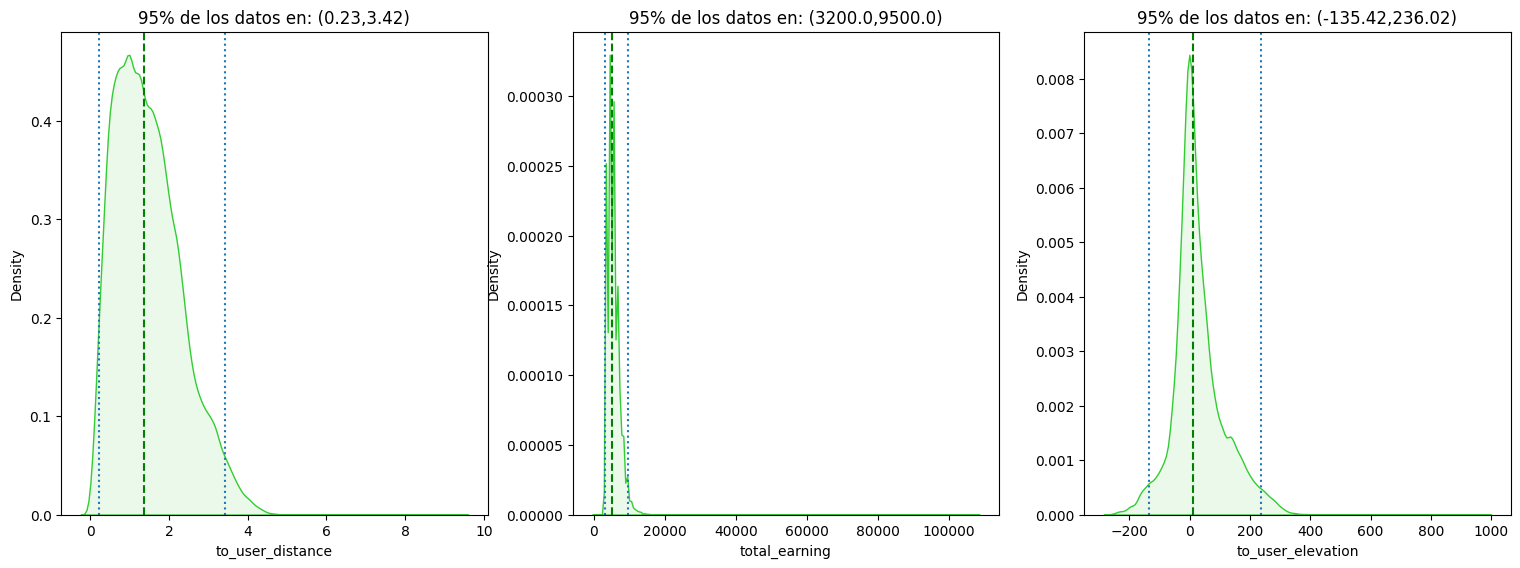

In [296]:

fig, axs = plt.subplots(ncols=3)
for i in [2,3,4]:
    quantiles = np.quantile(dataset[dataset.columns[i]], q=(0.025, 0.975, 0.5))
    ax = sns.kdeplot(x = dataset[dataset.columns[i]], fill = True, color = "limegreen", alpha = 0.1, ax=axs[2-i])
    ax.axvline(x = quantiles[0], ymin = 0, ymax = 1, linestyle = ':')
    ax.axvline(x = quantiles[1], ymin = 0, ymax = 1, linestyle = ':')
    ax.axvline(x = quantiles[2], ymin = 0, ymax = 1, color = 'green', linestyle = '--')
    ax.set(title = '95% de los datos en: ({0},{1})'.format(round(quantiles[0], 2), round(quantiles[1],2)))
    

La distancia de la tienda al usuario está entre 0 y 9.36 kilómetros, destacando que el 95% de los usuarios se encuentra entre 0.23 y 3.42 kilómetros, por lo que rara vez los pedidos están más allá de los 4 km y el promedio de la distancia es de 1.47 km. En cuanto a las ganancias, el 95% de las ganancias por pedido de los couriers está entre los 3200 y los 9500 pesos, dónde rara vez la ganancia está por encima de los 10000 pesos por pedido con un promedio de 5374 pesos de ganancia. La elevación de los usuarios con respecto a la tienda varía entre -135.42 metros y 236.02 metros, con un promedio de 27 metros de diferencia; este item presenta la mayor cantidad de observaciones por encima y por debajo del promedio y el 95% de los datos, además que es el único donde el valor de la desviación estándar es mayor al valor promedio de los datos.

In [297]:
non_taken_df = dataset.loc[dataset['taken']==0,:]
non_taken_df.describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,taken
count,9.689000e+03,9.689000e+03,9689.000000,9689.000000,9689.000000,9689.0
mean,1.507970e+07,7.706063e+08,1.730976,23.672238,5084.823614,0.0
std,4.854365e+05,3.094613e+08,0.843599,89.789034,1896.889515,0.0
min,1.421081e+07,3.000000e+07,0.000000,-259.170288,200.000000,0.0
25%,1.465504e+07,9.000051e+08,1.094629,-25.133667,3600.000000,0.0
50%,1.508213e+07,9.000089e+08,1.689055,9.335571,4700.000000,0.0
75%,1.554548e+07,9.000131e+08,2.270345,63.798584,6000.000000,0.0
max,1.590252e+07,9.000173e+08,4.670187,475.685425,18700.000000,0.0


El total de órdenes que no son tomadas por ningún courier es de 9689.

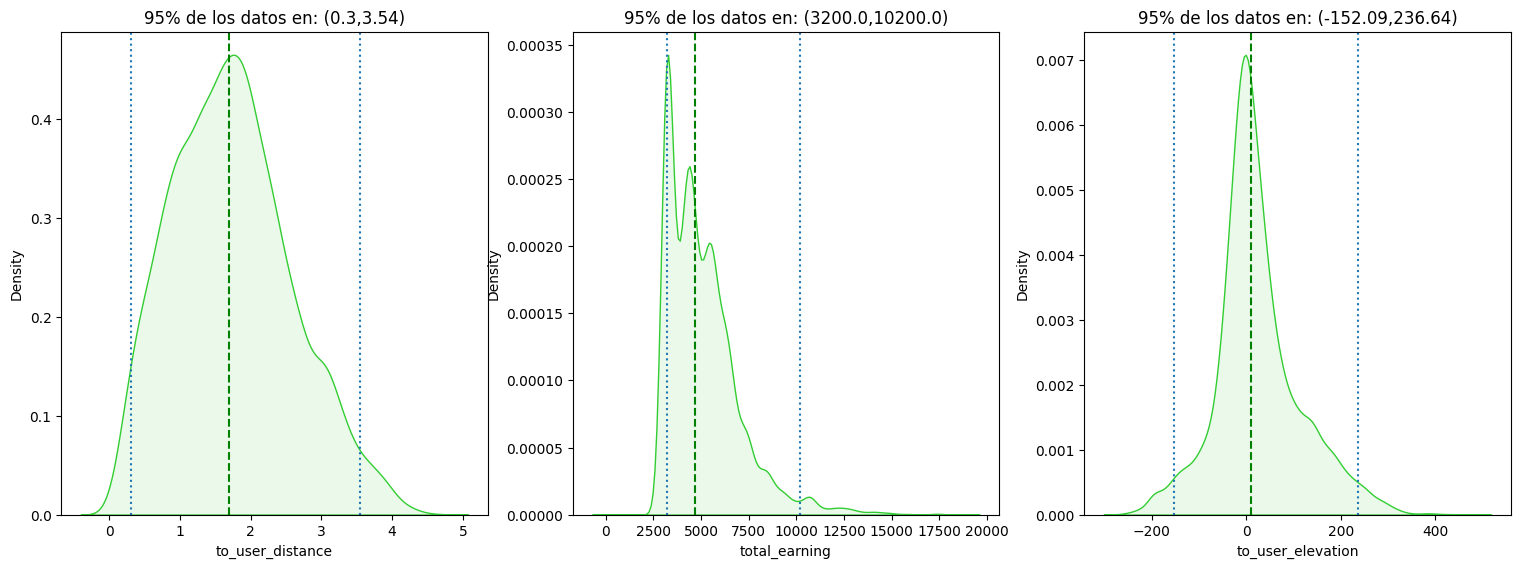

In [298]:


fig, axs = plt.subplots(ncols=3)
for i in [2,3,4]:
    quantiles = np.quantile(non_taken_df[non_taken_df.columns[i]], q=(0.025, 0.975, 0.5))
    ax = sns.kdeplot(x = non_taken_df[non_taken_df.columns[i]], fill = True, color = "limegreen", alpha = 0.1, ax=axs[2-i])
    ax.axvline(x = quantiles[0], ymin = 0, ymax = 1, linestyle = ':')
    ax.axvline(x = quantiles[1], ymin = 0, ymax = 1, linestyle = ':')
    ax.axvline(x = quantiles[2], ymin = 0, ymax = 1, color = 'green', linestyle = '--')
    ax.set(title = '95% de los datos en: ({0},{1})'.format(round(quantiles[0], 2), round(quantiles[1],2)))

Al analizar sólamente los casos donde no se toman las órdenes por los courier, no se ve una diferencia tan importante a nivel del 95% de los datos observados totales, salvo en el item de ganancia total donde el 97.5% de los registros están un poco por encima de los pedidos tomados; sin embargo, el promedio de ganancia está en los 5083 pesos, ligeramente por debajo de la totalidad de las observaciones lo que indicaría que suelen rechazarse pedidos cuando la ganancia es menor. 

#### Coeficiente de Variación.

Se usa para medir la variabilidad de un conjunto de datos dado. A pesar de que es una medida adimensional, es útil para relacionar la desviación estándar con el tamaño de la media. Se expresa como: 

$$C_v = \frac{\sigma}{\overline{x}}$$

In [299]:
# Coeficientes de variación para las variables numéricas
def coef_variacion(serie):
    return(round(np.std(serie) / np.mean(serie)*100, 2))

for i in [2,3,4]:
    print('Coeficiente de variación de {0}: {1}%'.format(dataset.columns[i], coef_variacion(dataset[dataset.columns[i]])))


Coeficiente de variación de to_user_distance: 57.34%
Coeficiente de variación de to_user_elevation: 309.9%
Coeficiente de variación de total_earning: 33.21%


En este caso, la elevación en metros entre la tienda y el usuario, es la variable con mayor variabilidad del conjunto de datos, por lo que será necesario reprocesar los datos antes de aplicar cualquier tipo de metodología estadística con el fin de identificar las causas de que una orden no sea aceptada.

### 2. Análisis por unidad temporal

In [300]:
def morning_time(x):
    if x >= 23 or 0<= x <= 2:
        result = 'Midnight'
    elif x >=20:
        result = 'Night'
    elif x >= 17: 
        result = 'Evening'
    elif x >= 12:
        result = 'Afternoon'
    elif x >= 7: 
        result = 'Morning'
    else:
        result = 'Early morning'
    return(result)


dataset['day'] = dataset['created_at'].dt.dayofweek
# Day of week toma cómo 0 el día lunes

dataset['hour'] = dataset['created_at'].dt.hour
dataset['daytime'] = dataset['hour'].apply(morning_time)
non_taken_df = dataset.loc[dataset['taken']==0,:]

#### Análisis por hora del día

<Axes: xlabel='hour', ylabel='order_id'>

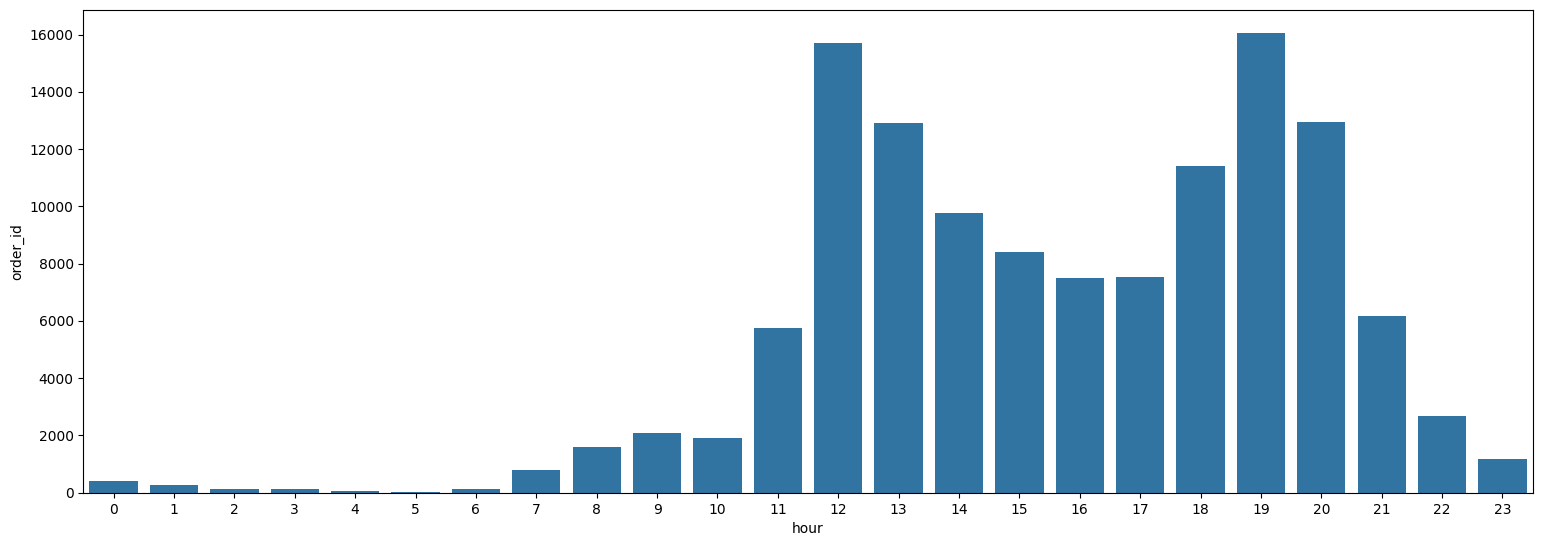

In [301]:
hour_analysis = dataset.groupby(['hour', 'daytime'])[['order_id']].count().reset_index()
sns.barplot(x = 'hour', y = 'order_id', data = hour_analysis)

No es de sorprender ver los picos de órdenes creadas en la hora de almuerzo y la hora de la cena con picos entre las 12 y las 13 horas, y picos entre las 18 y las 20 horas con un nivel relativamente constante entre las 14 y las 17 horas. Las órdenes caen al mínimo entre las 23 y las 7 horas. 

([<matplotlib.patches.Wedge at 0x1b9992ec790>,
 [Text(0.23200176943173825, 1.0752558667501158, 'Afternoon'),
  Text(-1.00590352040737, 0.44514953401307716, 'Early morning'),
  Text(-0.9818425800562577, -0.4959688982068042, 'Evening'),
  Text(-0.19384654315727573, -1.0827850745674206, 'Midnight'),
  Text(0.1938193897250067, -1.082789935382956, 'Morning'),
  Text(0.9408411526423861, -0.5699280002724436, 'Night')],
 [Text(0.12654641969003902, 0.5865032000455176, '43%'),
  Text(-0.5486746474949291, 0.2428088367344057, '0%'),
  Text(-0.5355504982125041, -0.27052848993098405, '28%'),
  Text(-0.10573447808578675, -0.5906100406731385, '2%'),
  Text(0.10571966712273091, -0.5906126920270669, '10%'),
  Text(0.5131860832594833, -0.31086981833042376, '17%')])

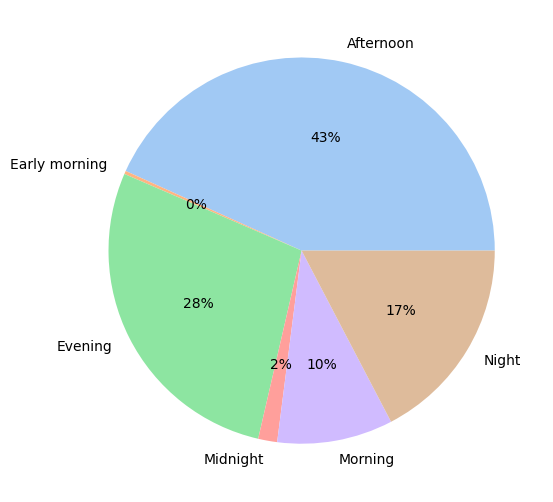

In [302]:
daytime_analysis = dataset.groupby(['daytime'])[['order_id']].count().reset_index()
plt.pie(daytime_analysis['order_id'], labels = daytime_analysis['daytime'], colors = sns.color_palette('pastel'), autopct='%.0f%%')

Las órdenes creadas se centran principalmente en las franjas horarias de "Afternoon" definida entre las 12 y las 17 horas, "Evening" definida entre las 17 y las 20 horas y "Night" entre las 20 y 23 horas. Esto denota un comportamiento de consumo centrado en las horas de la tarde / noche por lo que se tiene que tener en cuenta que sólo un 10% de las órdenes totales son hechas entre las 7 y las 11 horas.

<Axes: xlabel='hour', ylabel='order_id'>

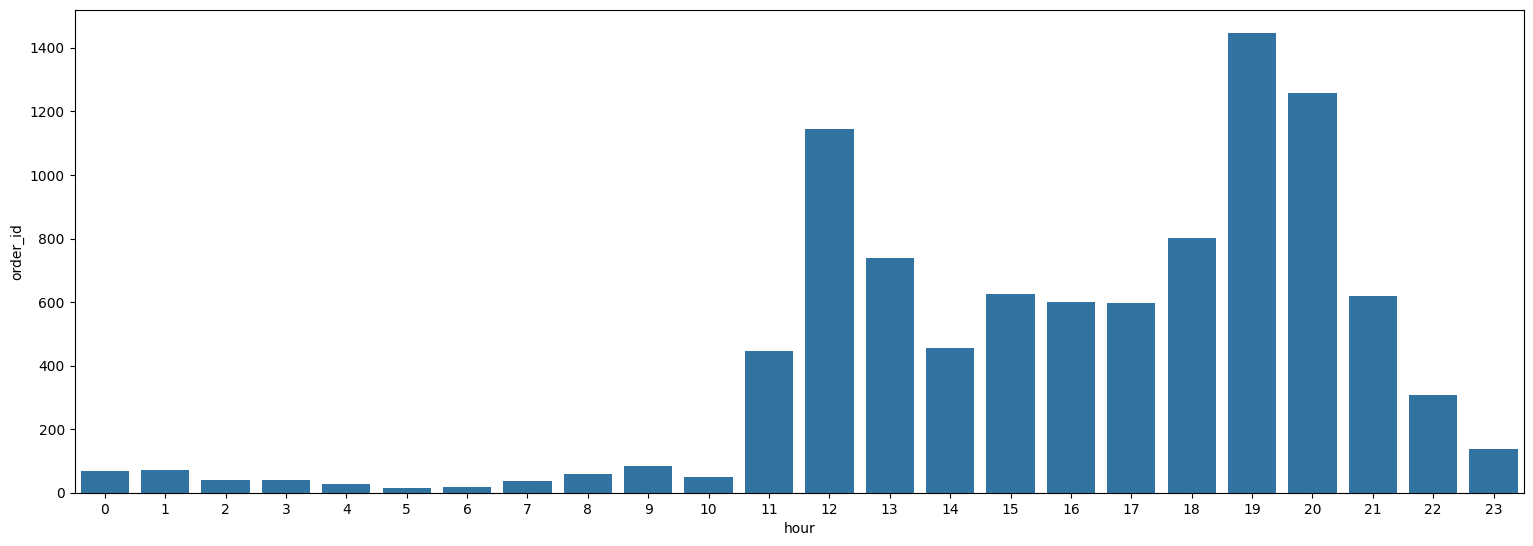

In [303]:
non_taken_hour_analysis = non_taken_df.groupby(['hour', 'daytime'])[['order_id']].count().reset_index()
sns.barplot(x = 'hour', y = 'order_id', data = non_taken_hour_analysis)

Las órdenes no tomadas tienen una distribución similar al número total de órdenes, sin embargo se toman menos en las horas de tarde/noche que en las horas de la mañana.

([<matplotlib.patches.Wedge at 0x1b99968eaf0>,
 [Text(0.44435627717672227, 1.0062541920079857, 'Afternoon'),
  Text(-0.7664499532240575, 0.7890212096026571, 'Early morning'),
  Text(-1.0868696674506182, -0.16945301996654707, 'Evening'),
  Text(-0.4171180441506795, -1.0178470107260285, 'Midnight'),
  Text(-0.07252906274299357, -1.0976062750629767, 'Morning'),
  Text(0.8348288373762334, -0.716282634359543, 'Night')],
 [Text(0.24237615118730302, 0.5488659229134466, '37%'),
  Text(-0.41806361084948584, 0.4303752052378129, '1%'),
  Text(-0.5928380004276098, -0.09242891998175294, '29%'),
  Text(-0.22751893317309785, -0.5551892785778336, '3%'),
  Text(-0.03956130695072377, -0.5986943318525327, '7%'),
  Text(0.4553611840234, -0.39069961874156883, '23%')])

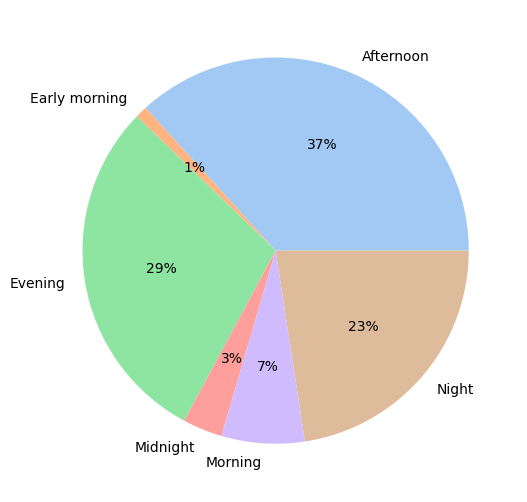

In [304]:
non_taken_daytime_analysis = non_taken_df.groupby(['daytime'])[['order_id']].count().reset_index()
plt.pie(non_taken_daytime_analysis['order_id'], labels = non_taken_daytime_analysis['daytime'], colors = sns.color_palette('pastel'), autopct='%.0f%%')

Los porcentajes en las órdenes no tomadas aumentan en horas de la noche y disminuyen en horas de la mañana y la tarde. Una primera hipótesis es que la hora del día podría influir a la hora de que un courier acepte o no una orden.

<Axes: xlabel='daytime'>

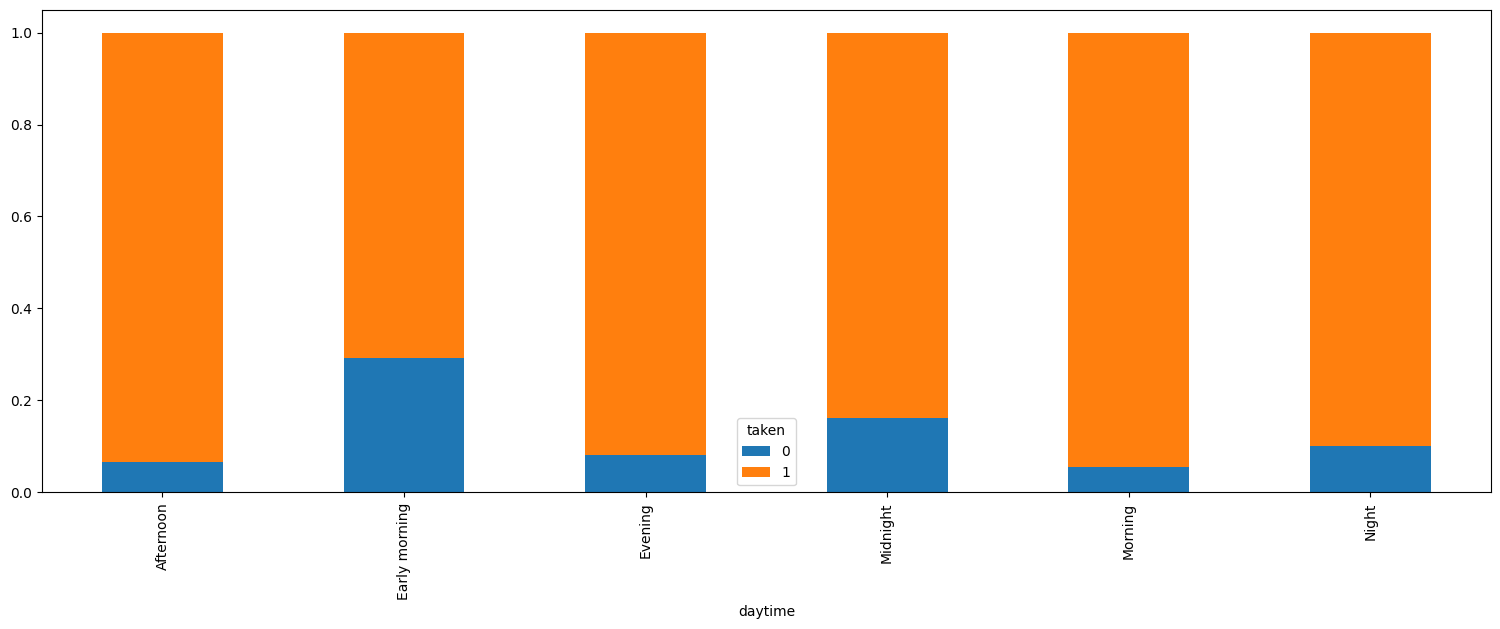

In [305]:
non_taken_group_daytime = dataset.groupby(['daytime', 'taken'])[['order_id']].count() / dataset.groupby(['daytime'])[['order_id']].count()
non_taken_group_daytime.reset_index().pivot_table(index = 'daytime', values = 'order_id', columns = 'taken').plot(kind = 'bar', stacked=True)

La hora del día en la que menos se aceptan pedidos es en la madrugada, seguida de la media noche y la noche. Se rechazan menos pedidos en la mañana que en las horas del final de la tarde. 

#### Análisis por día de la semana

<Axes: xlabel='day', ylabel='order_id'>

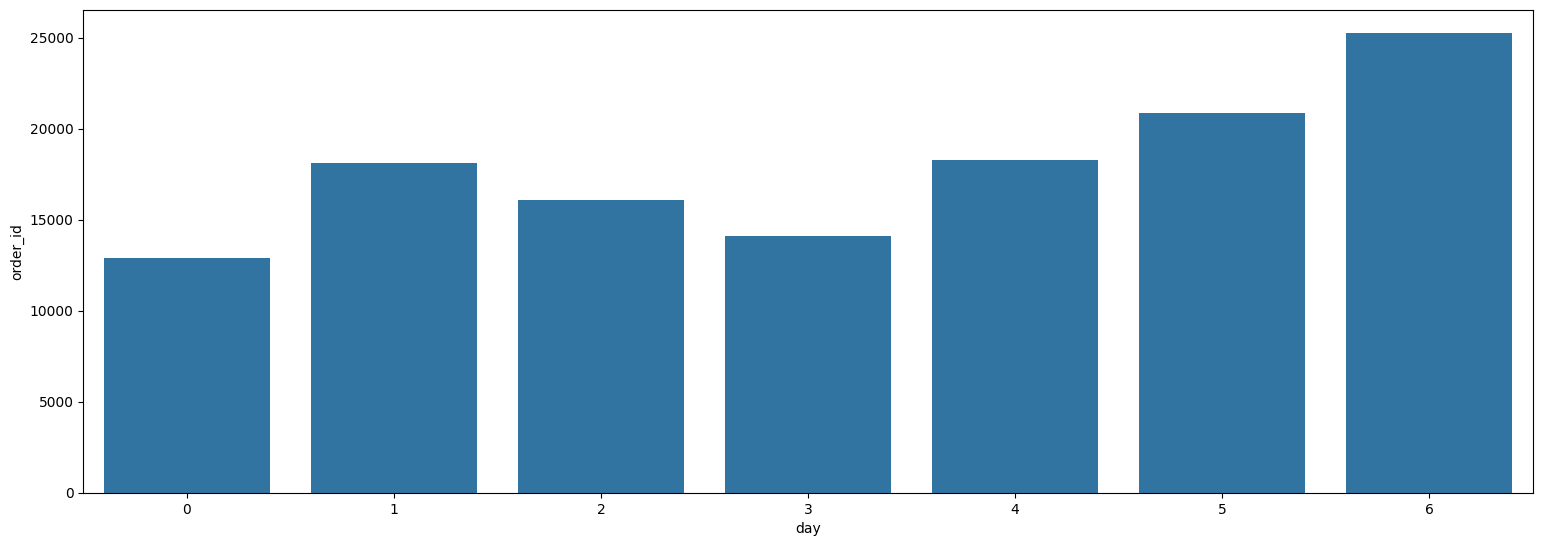

In [306]:
day_analysis = dataset.groupby(['day'])[['order_id']].count().reset_index()
sns.barplot(x = 'day', y = 'order_id', data = day_analysis)

Los fines de semana definidos como viernes, sábado y domingo; y los martes son los días con más pedidos realizados. Los lunes son el día con menos pedidos realizados en la plataforma.

<Axes: xlabel='day', ylabel='order_id'>

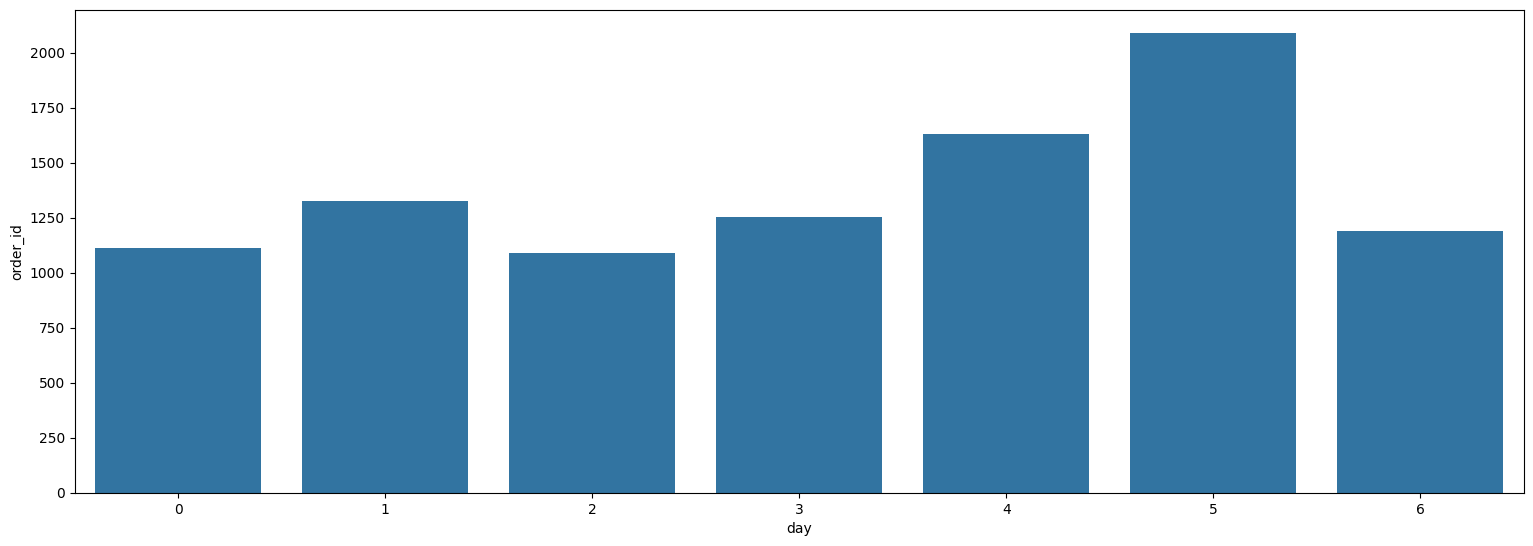

In [307]:
non_taken_day_analysis = non_taken_df.groupby(['day'])[['order_id']].count().reset_index()
sns.barplot(x = 'day', y = 'order_id', data = non_taken_day_analysis)

Sin embargo los días en los que menos se aceptan pedidos por parte de los courier son los sábados y los viernes. Casualmente, son los días con mayor actividad nocturna de la semana, contrastando directamente con que los pedidos más rechazados por franja horaria suelen ser en horas de la madrugada / noche. Los martes también se suelen rechazar más pedidos de lo habitual.

#### Análisis de correlación

In [308]:
dataset.iloc[:,[2,3,4]].corr(method='kendall')

,to_user_distance,to_user_elevation,total_earning
to_user_distance,1.000000,0.093507,0.131557
to_user_elevation,0.093507,1.000000,0.062477
total_earning,0.131557,0.062477,1.000000


In [309]:
dataset.loc[dataset['taken'] == 0, :].iloc[:,[2,3,4]].corr(method='kendall')

,to_user_distance,to_user_elevation,total_earning
to_user_distance,1.000000,0.062622,0.162059
to_user_elevation,0.062622,1.000000,0.020032
total_earning,0.162059,0.020032,1.000000


Haciendo uso del coeficiente de correlación rankeado de Kendall, se encuentra que existe cierta relación entre las ganancias totales y la distancia del usuario. Sin embargo, esta relación es apenas notable, a pesar de que incrementa levemente cuando se analiza sólamente las órdenes que no fueron tomadas por algún courier. 

## Parte 2: Modelación

In [310]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel


# Clasificación vía árboles (no lineal)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Clasificación vía regresión logística (lineal)
from sklearn.linear_model import LogisticRegression
# Clasificación vía naive bayes (independencia lineal)
from sklearn.naive_bayes import BernoulliNB
# Clasificación vía SVM (independencia lineal, discriminante lineal)
from sklearn.svm import LinearSVC
# Clasificación vía XGB
from sklearn.ensemble import GradientBoostingClassifier

# Revisión de modelos
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score


### 1. Preparar el dataset

Es importante configurar el dataset, ya que la clase que nos importa, está sub-representada en el conjunto de datos. Por ende, se procederá a hacer un rebalanceo basándonos en *under-sampling* de manera que la clase que está sobrerepresentada será muestreada aleatoriamente, mientras que la clase sub-representada se mantendrá estática. La ventaja es que nos permitirá tener mejores resultados en los modelos, sin embargo, existe el riesgo de que información valiosa se pierda. Para evitar esto, se crean 5 datasets aleatorios tomados de los registros de la clase sobrerepresentada con sus respectivos estados aleatorios (para reproducibilidad).

In [311]:
dataset.taken.value_counts()

taken
1    115860
0      9689
Name: count, dtype: int64

In [312]:
dataset

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,day,hour,daytime
0,14364873,30000009,2.478101,-72.719360,4200.0,2017-09-07 20:02:17+00:00,0,3,20,Night
1,14370123,30000058,0.451711,37.754761,4200.0,2017-09-07 20:13:16+00:00,0,3,20,Night
2,14368534,900003684,2.026072,207.191162,4000.0,2017-09-07 20:07:23+00:00,0,3,20,Night
3,14369923,900014085,0.965496,117.429199,3450.0,2017-09-07 20:12:14+00:00,1,3,20,Night
4,14367859,900004363,0.577156,-7.895874,5200.0,2017-09-07 20:13:16+00:00,1,3,20,Night
...,...,...,...,...,...,...,...,...,...,...
125544,15650722,900005635,1.503389,86.380493,6350.0,2017-09-30 16:20:01+00:00,1,5,16,Afternoon
125545,15651534,900005727,2.442553,289.788574,4450.0,2017-09-30 16:26:01+00:00,1,5,16,Afternoon
125546,15651511,900010396,0.094488,0.094238,5200.0,2017-09-30 16:26:01+00:00,1,5,16,Afternoon
125547,15651572,30000322,2.119052,183.751465,3700.0,2017-09-30 16:27:00+00:00,1,5,16,Afternoon


In [313]:
dataset_taken_0 = dataset.loc[dataset['taken']==0,:].iloc[:,[6,2,3,4,7,8]]
dataset_taken_1 = dataset.loc[dataset['taken']!=0,:].iloc[:,[6,2,3,4,7,8]]

dataset_taken_1_und = []

for i in range(4):
    dataset_taken_1_und.append(dataset_taken_1.sample(n = 9689, replace=False, random_state=i))

In [314]:
dataset_modelling = []

for i in range(4): 
    dataset_modelling.append(pd.concat([dataset_taken_0, dataset_taken_1_und[i]]))

#### Escalar la data continua

In [315]:
scaler = StandardScaler()

for i in range(4):
    dataset_modelling[i].iloc[:,[1,2,3]] = pd.DataFrame(np.asmatrix(scaler.fit_transform(dataset_modelling[i].iloc[:,[1,2,3]])))

# scaler.inverse_transform(x) para desescalar la data

#### Convertir en dummys todas las variables categóricas

In [316]:
one_hot = OneHotEncoder(sparse_output=False, drop='first')

for i in range(4):
    cat_X = one_hot.fit_transform(dataset_modelling[i][['day', 'hour']])
    
    cat_X_aux = pd.DataFrame(np.asmatrix(cat_X), index = dataset_modelling[i].index)
    cat_X_aux.columns = one_hot.get_feature_names_out()

    dataset_modelling[i] = pd.concat([dataset_modelling[i].drop(['day', 'hour'], axis = 1), cat_X_aux], axis=1)


#### Partición train / test

In [317]:
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

for i in range(4):
    X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(dataset_modelling[i].iloc[:,1:], 
                                                                        dataset_modelling[i].iloc[:,0], 
                                                                        train_size=0.7,
                                                                        random_state=2314+i)
    X_train_list.append(X_train_aux)
    X_test_list.append(X_test_aux)
    y_train_list.append(y_train_aux)
    y_test_list.append(y_test_aux)


### 2. Establecimiento de Pipelines y parámetros

In [318]:
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [319]:
models = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'NaiveBayes': BernoulliNB(),    
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LinearSVC': LinearSVC()
}

In [320]:
parameters = {
    'ExtraTreesClassifier':{'n_estimators':[50,100], 'max_depth':[4,8,12], 'random_state':[1234]},
    'RandomForest':{'n_estimators':[50, 100], 'max_depth':[4,8,12], 'random_state':[1234]},
    'LogisticRegression':{'fit_intercept':[True, False], 'solver':['lbfgs', 'newton-cholesky', 'sag'], 'random_state':[1234]},
    'NaiveBayes':{'fit_prior':[True, False]},
    'GradientBoostingClassifier':{'n_estimators':[32, 64, 100], 'learning_rate':[0.5, 0.75, 1.0],'random_state':[1234]},
    'LinearSVC':{'fit_intercept':[True, False], 'loss':['hinge', 'squared_hinge'],'random_state':[1234]}
}

### 3. Ejecución (Tiempo estimado: 5m 24s)

In [321]:
helper1 = EstimatorSelectionHelper(models, parameters)
results = []

for i in range(4):
    for j in ['roc_auc', 'f1', 'accuracy', 'precision', 'recall']:
        helper1.fit(X_train_list[i], y_train_list[i], scoring=j, n_jobs=4)
        aux = helper1.score_summary(sort_by='max_score')
        aux['metric'] = j
        aux['dataset'] = i
        results.append(aux)


Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


Running GridSearchCV for RandomForest.
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Running GridSearchCV for NaiveBayes.
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Running GridSearchCV for LinearSVC.
Fitting 3 folds for each of 4 candidates, totalling 12 fits
ExtraTreesClassifier
RandomForest
LogisticRegression
NaiveBayes
GradientBoostingClassifier
LinearSVC
Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Running GridSearchCV for RandomForest.
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Running GridSearchCV for NaiveBayes.
Fitting 3 folds for each of 2 candidates, 

In [322]:
results = pd.concat(results)


In [323]:
aux = results


In [324]:
aux.columns[[0,5,6,7,8,9,10,11,12,14]]

Index(['estimator', 'max_depth', 'n_estimators', 'random_state',
       'fit_intercept', 'solver', 'fit_prior', 'learning_rate', 'loss',
       'dataset'],
      dtype='object')

In [325]:
aux['key'] = aux[aux.columns[[0,5,6,7,8,9,10,11,12]]].apply(
    lambda x: '_'.join(x.dropna().astype(str)),
    axis=1
)
aux

,estimator,min_score,mean_score,max_score,std_score,max_depth,n_estimators,random_state,fit_intercept,solver,fit_prior,learning_rate,loss,metric,dataset,key
21,GradientBoostingClassifier,0.699434,0.703947,0.707471,0.003355,NaN,64,1234,NaN,NaN,NaN,0.5,NaN,roc_auc,0,GradientBoostingClassifier_64_1234_0.5
20,GradientBoostingClassifier,0.705359,0.70573,0.70605,0.000284,NaN,32,1234,NaN,NaN,NaN,0.5,NaN,roc_auc,0,GradientBoostingClassifier_32_1234_0.5
22,GradientBoostingClassifier,0.694976,0.701558,0.705197,0.004663,NaN,100,1234,NaN,NaN,NaN,0.5,NaN,roc_auc,0,GradientBoostingClassifier_100_1234_0.5
23,GradientBoostingClassifier,0.695375,0.701363,0.70492,0.004259,NaN,32,1234,NaN,NaN,NaN,0.75,NaN,roc_auc,0,GradientBoostingClassifier_32_1234_0.75
24,GradientBoostingClassifier,0.687977,0.695458,0.700889,0.005467,NaN,64,1234,NaN,NaN,NaN,0.75,NaN,roc_auc,0,GradientBoostingClassifier_64_1234_0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,ExtraTreesClassifier,0.495996,0.513493,0.524021,0.012457,12,50,1234,NaN,NaN,NaN,NaN,NaN,recall,3,ExtraTreesClassifier_12_50_1234
3,ExtraTreesClassifier,0.469751,0.495552,0.508897,0.018247,8,100,1234,NaN,NaN,NaN,NaN,NaN,recall,3,ExtraTreesClassifier_8_100_1234
2,ExtraTreesClassifier,0.449733,0.48013,0.50089,0.021968,8,50,1234,NaN,NaN,NaN,NaN,NaN,recall,3,ExtraTreesClassifier_8_50_1234
1,ExtraTreesClassifier,0.409253,0.421263,0.428381,0.008541,4,100,1234,NaN,NaN,NaN,NaN,NaN,recall,3,ExtraTreesClassifier_4_100_1234


In [326]:
aux.pivot_table(index = 'key', 
                columns = 'metric',
                values = 'max_score', 
                aggfunc=np.mean).sort_values('roc_auc', ascending=False)

metric,accuracy,f1,precision,recall,roc_auc
key,,,,,
GradientBoostingClassifier_32_1234_0.5,0.657045,0.658935,0.654903,0.666793,0.707792
GradientBoostingClassifier_32_1234_0.75,0.656677,0.660459,0.653066,0.67021,0.705682
GradientBoostingClassifier_64_1234_0.5,0.656271,0.658646,0.653458,0.667919,0.704813
GradientBoostingClassifier_100_1234_0.5,0.651313,0.655167,0.649477,0.66553,0.70076
GradientBoostingClassifier_64_1234_0.75,0.649212,0.653751,0.644762,0.663826,0.697242
GradientBoostingClassifier_32_1234_1.0,0.647921,0.652358,0.646806,0.664573,0.695075
RandomForest_12_100_1234,0.642119,0.640423,0.644935,0.638574,0.69279
RandomForest_12_50_1234,0.64328,0.63869,0.646485,0.636049,0.691277
GradientBoostingClassifier_100_1234_0.75,0.642004,0.64544,0.63938,0.653431,0.689476


A través de los modelos y distintas configuraciones probadas, junto con los diferentes remuestreos del dataset original, se concluye que el modelo que mejor desempeño tiene es el Gradient Boost Classifier con un número de estimadores de 32 y una tasa de aprendizaje de 0.5. Este modelo se usará para evaluar las métricas en la partición de testeo y analizar más a fondo los resultados. 

### 4. Modelo establecido

In [327]:
final_models = []
# final_statistics = []
list_f1, list_acc, list_prec, list_recall, list_roc = [], [], [], [], []

for i in range(4):
    aux = GradientBoostingClassifier(n_estimators=32, random_state=1234, learning_rate=0.5).fit(X_train_list[i], y_train_list[i])
    final_models.append(aux) 
    aux_2 = aux.predict(X_test_list[i])
    list_f1.append(f1_score(y_test_list[i], aux_2))
    list_acc.append(accuracy_score(y_test_list[i], aux_2))
    list_prec.append(precision_score(y_test_list[i], aux_2))
    list_recall.append(recall_score(y_test_list[i], aux_2))
    list_roc.append(roc_auc_score(y_test_list[i], aux_2))


In [328]:
final_statistics = pd.DataFrame.from_dict({'accuracy':list_acc, 
                                           'f1 score': list_f1, 
                                           'precision': list_prec,
                                           'recall':list_recall,
                                           'roc auc': list_roc})
final_statistics

,accuracy,f1 score,precision,recall,roc auc
0,0.647403,0.651716,0.649289,0.654161,0.647344
1,0.646199,0.651651,0.638566,0.665284,0.646297
2,0.653423,0.652286,0.649931,0.654659,0.653431
3,0.644479,0.651727,0.646823,0.656706,0.644317


Ya que el modelo no se ajusta por medio de validación cruzada, se pierden algunos puntos en los estadísticos de ROC - AUC. Sin embargo, se puede ver que las métricas se mantienen constantes a través de los diferentes remuestreos del dataset original, lo que da un buen indicio de consistencia en los modelos. 

In [329]:
pd.DataFrame(np.asmatrix(final_models[0].predict_proba(X_test_list[0])))

,0,1
0,0.574903,0.425097
1,0.358808,0.641192
2,0.309766,0.690234
3,0.637790,0.362210
4,0.630254,0.369746
...,...,...
5809,0.324351,0.675649
5810,0.296397,0.703603
5811,0.357986,0.642014
5812,0.691962,0.308038


In [330]:
aux

GradientBoostingClassifier(learning_rate=0.5, n_estimators=32,
                           random_state=1234)